# EDA Steam Games 

Exploratory data analysis (EDA) is a fundamental phase in the process of understanding and preparing data. In this case, we have a dataset related to games from Steam, a digital distribution platform for video games. This EDA will focus on exploring the different characteristics of the games present in the dataset.


In this phase, we are going to use Python and some of its libraries, such as pandas, matplotlib and seaborn, to explore and visualize our dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

C:\Users\saale\AppData\Local\Temp\ipykernel_17736\1465787856.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load dataset

In [2]:
file_path = '../data/games.csv'
games = pd.read_csv(file_path)

games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Concise summary of the dataframe, including the number of rows and columns, the column names, the data types in each column, and the number of non-null values present in each column.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

Detailed summary of the DataFrame games, including information about columns, data types, missing values, number of rows, and number of unique values.

In [5]:
df_summary = {
    'columns': games.columns,
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],
    'unique': games.nunique()
}

print(pd.DataFrame(df_summary))

                                               columns    types  missing  \
AppID                                            AppID    int64        0   
Name                                              Name   object        6   
Release date                              Release date   object        0   
Estimated owners                      Estimated owners   object        0   
Peak CCU                                      Peak CCU    int64        0   
Required age                              Required age    int64        0   
Price                                            Price  float64        0   
DLC count                                    DLC count    int64        0   
About the game                          About the game   object     3567   
Supported languages                Supported languages   object        0   
Full audio languages              Full audio languages   object        0   
Reviews                                        Reviews   object    75360   
Header image

We made a bar chart showing the number of columns of each type of data in the DataFrame games.

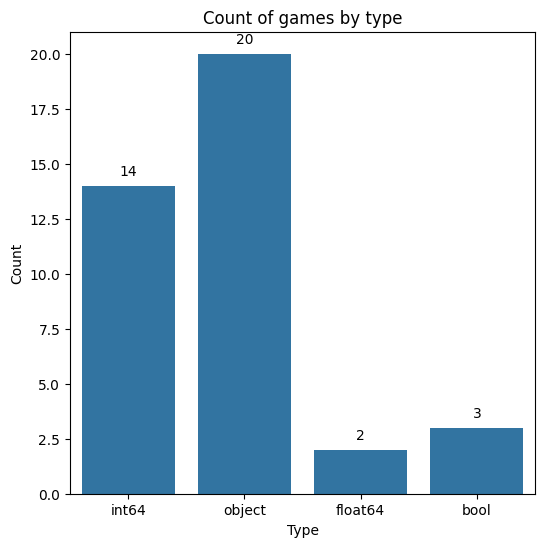

In [6]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=df_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

We change the column names in the DataFrame games so that the first letter of each word in each column name is capitalized.

In [4]:
def capitalize_next_word(column_name):
    result = ""
    capitalize_next = True
    for char in column_name:
        if char == " ":
            capitalize_next = True
        elif capitalize_next:
            result += char.upper()
            capitalize_next = False
        else:
            result += char
    return result

games.rename(columns=capitalize_next_word, inplace=True)
games.columns


Index(['AppID', 'Name', 'ReleaseDate', 'EstimatedOwners', 'PeakCCU',
       'RequiredAge', 'Price', 'DLCCount', 'AboutTheGame',
       'SupportedLanguages', 'FullAudioLanguages', 'Reviews', 'HeaderImage',
       'Website', 'SupportUrl', 'SupportEmail', 'Windows', 'Mac', 'Linux',
       'MetacriticScore', 'MetacriticUrl', 'UserScore', 'Positive', 'Negative',
       'ScoreRank', 'Achievements', 'Recommendations', 'Notes',
       'AveragePlaytimeForever', 'AveragePlaytimeTwoWeeks',
       'MedianPlaytimeForever', 'MedianPlaytimeTwoWeeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

Release Date 

In [8]:
games['ReleaseDate'] = pd.to_datetime(games['ReleaseDate'], format='mixed')
games.head(2)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,AboutTheGame,SupportedLanguages,...,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Name nullos 

In [9]:
games.loc[games['Name'].isna()].index

Index([25222, 72038, 77215, 77487, 77561, 77721], dtype='int64')

In [10]:
#Delete null names 
games = games.drop(games.loc[games['Name'].isna()].index)
games.isna().sum()

AppID                          0
Name                           0
ReleaseDate                    0
EstimatedOwners                0
PeakCCU                        0
RequiredAge                    0
Price                          0
DLCCount                       0
AboutTheGame                3562
SupportedLanguages             0
FullAudioLanguages             0
Reviews                    75354
HeaderImage                    0
Website                    45645
SupportUrl                 43511
SupportEmail               13590
Windows                        0
Mac                            0
Linux                          0
MetacriticScore                0
MetacriticUrl              81185
UserScore                      0
Positive                       0
Negative                       0
ScoreRank                  85053
Achievements                   0
Recommendations                0
Notes                      72079
AveragePlaytimeForever         0
AveragePlaytimeTwoWeeks        0
MedianPlay

In [11]:
games.loc[games['AboutTheGame'].isna(),"Name"]

105                             溪风谷之战 Playtest
180                      Burial Stone Playtest
214                  Emperial Knights Playtest
220                     Slotracers VR Playtest
291      Pirates of the Asteroid Belt Playtest
                         ...                  
85003                         Elysium Playtest
85040                         Dastaan Playtest
85062                               SlipBreak™
85088                Backpack Battles Playtest
85095               Scorching Engines Playtest
Name: Name, Length: 3562, dtype: object

Imputacion About the Game

In [12]:
games['AboutTheGame'].fillna('', inplace=True)


C:\Users\saale\AppData\Local\Temp\ipykernel_20692\1966714665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['AboutTheGame'].fillna('', inplace=True)


In [ ]:
games.isna().sum()

SupportedLanguages

Conocer la cantidad de idiomas que se pueden utilizar en el juego 

In [14]:
games['NumSupportedLanguages'] = games['SupportedLanguages'].apply(lambda x: len(x.split(', ')))


In [6]:
games['SupportedLanguages']

0                                              ['English']
1        ['English', 'French', 'Italian', 'German', 'Sp...
2                       ['English', 'Portuguese - Brazil']
3        ['English', 'French', 'Italian', 'German', 'Sp...
4                           ['English', 'Spanish - Spain']
                               ...                        
85098                               ['English', 'Finnish']
85099                                          ['English']
85100                                          ['English']
85101                                          ['English']
85102                                          ['English']
Name: SupportedLanguages, Length: 85103, dtype: object

In [13]:
# Split de la columna SupportedLanguages
df_languages = games['SupportedLanguages'].str.strip("[]").str.split(', ', expand=True)

# Melt para llevar las columnas a filas
df_melted = pd.melt(df_languages, value_name='Language').dropna()['Language'].str.strip("'")

# Contar la frecuencia de cada lenguaje
language_counts = df_melted.value_counts().reset_index()

# Renombrar las columnas
language_counts.columns = ['Language', 'Frequency']

# Mostrar el resultado
#print(language_counts)


In [18]:
language_counts['Language'].unique()

array(['English', 'Simplified Chinese', 'German', 'French', 'Russian',
       'Spanish - Spain', 'Japanese', 'Italian', 'Korean',
       'Traditional Chinese', 'Portuguese - Brazil', 'Polish', 'Turkish',
       'Spanish - Latin America', 'Dutch', 'Portuguese', '', 'Czech',
       'Swedish', 'Ukrainian', 'Hungarian', 'Arabic', 'Thai', 'Danish',
       'Norwegian', 'Finnish', 'Romanian', 'Greek', 'Vietnamese',
       'Bulgarian', 'Portuguese - Portugal', 'Indonesian', 'Hindi',
       'Catalan', 'Malay', 'Slovak', 'Serbian', 'Latvian', 'Lithuanian',
       'Hebrew', 'Croatian', 'Bangla', 'Estonian', 'Basque', 'Filipino',
       'Belarusian', 'Azerbaijani', 'Albanian', 'Galician', 'Persian',
       'Afrikaans', 'Urdu', 'Georgian', 'Slovenian', 'Bosnian',
       'Icelandic', 'Irish', 'Kazakh', 'Macedonian', 'Mongolian', 'Uzbek',
       'Luxembourgish', 'Zulu', 'Swahili', 'Welsh', 'Malayalam', 'Tajik',
       'Tamil', 'Kinyarwanda', 'Tatar', 'Punjabi (Gurmukhi)', 'Nepali',
       'Yoruba', '

In [16]:
unique_values = games['NumSupportedLanguages'].unique()
print(unique_values)


[  1  10   2  11   3   9   5   6  15   4   7  12  16  22   8  21  18  29
  20  17  14  13  19  26  24  25  27  28  23 103  94  37  36  33 101  32
  72  88  92  75  90  31 102  30  35  76  97  38  91  95  63  39  34]


In [17]:
idiomas_frecuencia = games['SupportedLanguages'].apply(pd.Series).stack().value_counts()
print(idiomas_frecuencia)

['English']                                                                                                                                                                                                                                                                                                43536
[]                                                                                                                                                                                                                                                                                                          3487
['English', 'Russian']                                                                                                                                                                                                                                                                                      2440
['Simplified Chinese']                                                               

Developers	

In [18]:
unique_values = games['Developers'].unique()
print(unique_values)

['Perpetual FX Creative' 'Rusty Moyher' 'Campião Games' ...
 'Xamk Game Studios' '955 Games' 'MCA']


In [19]:
games.loc[games['Developers'].isna(),"Name"].unique()

array(['溪风谷之战 Playtest', 'Burial Stone Playtest',
       'Emperial Knights Playtest', ..., 'Dastaan Playtest',
       'Backpack Battles Playtest', 'Scorching Engines Playtest'],
      dtype=object)

Categories 

In [20]:
games['Categories'].fillna('Unknown', inplace=True)


C:\Users\saale\AppData\Local\Temp\ipykernel_20692\1265828108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Categories'].fillna('Unknown', inplace=True)


In [ ]:
games.isna().sum()

Genres

Tags 

In [ ]:
print(games['Tags'])

In [ ]:
from collections import Counter

# Supongamos que tienes un DataFrame llamado df y la columna es 'tags'
# df = ...

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un nuevo DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_df = tags_df.sort_values(by='Count', ascending=False)

# Mostrar los 10 tags más comunes (puedes ajustar esto según tus necesidades)
print(tags_df)
print(tags_df['Tag'].unique()) 


In [ ]:

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tags', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_df = tags_df.sort_values(by='Count', ascending=False)

# Relacionar los tags con la columna 'EstimatedOwners'
tags_and_owners = pd.merge(games[['Tags', 'EstimatedOwners']], tags_df, left_on='Tags', right_on='Tags', how='left')

# Mostrar los primeros 10 registros del DataFrame resultante
print(tags_and_owners)


Estimated Owners

In [56]:
games['EstimatedOwners'].value_counts()

EstimatedOwners
0 - 20000                55284
0 - 0                    11499
20000 - 50000             7808
50000 - 100000            3886
100000 - 200000           2566
200000 - 500000           2142
500000 - 1000000           906
1000000 - 2000000          521
2000000 - 5000000          329
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

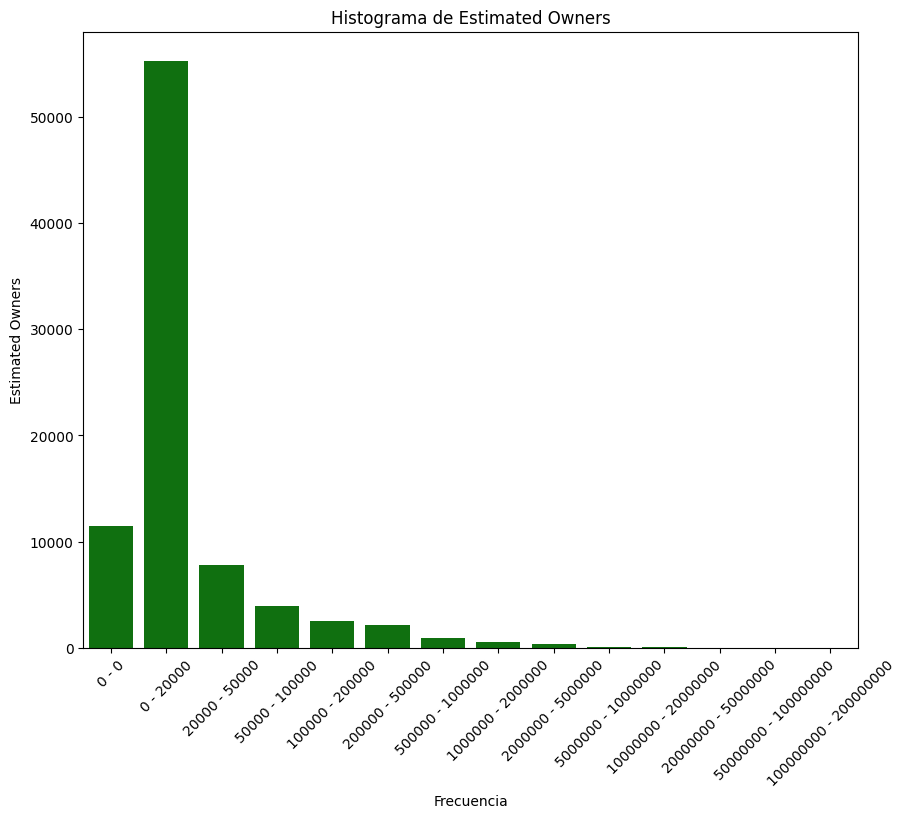

In [55]:
# Definir el orden correcto de las categorías
order = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000',
         '100000 - 200000', '200000 - 500000', '500000 - 1000000',
         '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
         '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000']

# Convertir la columna 'EstimatedOwners' a una categoría ordenada
games['EstimatedOwners'] = pd.Categorical(games['EstimatedOwners'], categories=order, ordered=True)

# Ordenar el DataFrame por la nueva columna 'EstimatedOwners'
games_sorted = games.sort_values(by='EstimatedOwners')

# Crear el gráfico de barras con Seaborn y ajustar el tamaño
plt.figure(figsize=(10, 8))
sns.countplot(x='EstimatedOwners', data=games_sorted, color='green')

plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Estimated Owners')
plt.title('Histograma de Estimated Owners')

# Mostrar el gráfico de barras
plt.show()
